In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from funcs import get_all_strategies, select_strategy, game_outcome, update_regret_vector

player 1 strategy


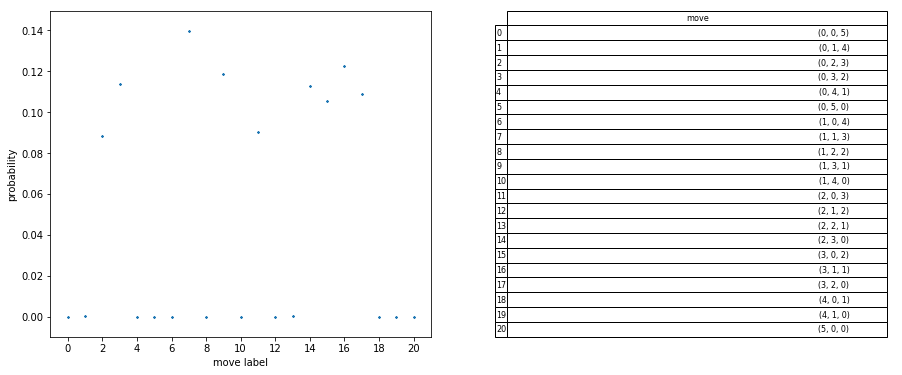

player 2 strategy


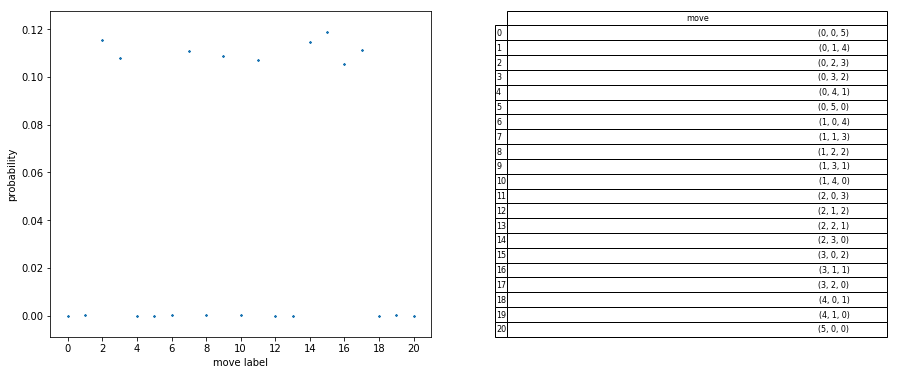

In [2]:
n_iter = 100000
num_battlefields = 3
num_soldiers_p1 = 5
num_soldiers_p2 = 5

p1_moves = get_all_strategies(num_battlefields, num_soldiers_p1)
p2_moves = get_all_strategies(num_battlefields, num_soldiers_p2)

p1_regret_vector = np.zeros(len(p1_moves))
p2_regret_vector = np.zeros(len(p2_moves))

p1_average_strategy = np.zeros(len(p1_moves))
p2_average_strategy = np.zeros(len(p2_moves))

for _ in range(n_iter):

    p1_move, p1_index = select_strategy(p1_moves, p1_regret_vector)
    p2_move, p2_index = select_strategy(p2_moves, p2_regret_vector)

    p1_average_strategy[p1_index] += 1
    p2_average_strategy[p2_index] += 1

    p1_regret_vector = update_regret_vector(p1_regret_vector, p1_moves,
                                            p1_move, p2_move)
    p2_regret_vector = update_regret_vector(p2_regret_vector, p2_moves,
                                            p2_move, p1_move)

p1_pos_regret_vector = [val if val > 0 else 0 for val in p1_regret_vector]
probabilities_p1 = p1_pos_regret_vector / np.sum(p1_pos_regret_vector)

p2_pos_regret_vector = [val if val > 0 else 0 for val in p2_regret_vector]
probabilities_p2 = p2_pos_regret_vector / np.sum(p2_pos_regret_vector)

print('player 1 strategy')
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
x = np.arange(len(p1_average_strategy))
ax1.scatter(x, p1_average_strategy / n_iter, s=3, marker='x')
plt.xticks(np.arange(x[0], x[-1] + 1, step=int(len(p1_moves)/10)))
ax2 = fig.add_subplot(122)
font_size = 8
bbox = [0, 0, 1, 1]
ax2.axis('off')
x_p1 = {str(idx): str(move) for idx, move in enumerate(p1_moves)}
df_p1 = pd.DataFrame.from_dict(x_p1, orient='index', columns=['move'])
mpl_table = ax2.table(cellText=df_p1.values,
                      rowLabels=df_p1.index, bbox=bbox, colLabels=df_p1.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
ax1.set_ylabel('probability')
ax1.set_xlabel('move label')
plt.show()

print('player 2 strategy')
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
x = np.arange(len(p2_average_strategy))
ax1.scatter(x, p2_average_strategy / n_iter, s=3, marker='x')
plt.xticks(np.arange(x[0], x[-1] + 1, step=int(len(p2_moves)/10)))
ax2 = fig.add_subplot(122)
font_size = 8
bbox = [0, 0, 1, 1]
ax2.axis('off')
x_p2 = {str(idx): str(move) for idx, move in enumerate(p2_moves)}
df_p2 = pd.DataFrame.from_dict(x_p2, orient='index', columns=['move'])
mpl_table = ax2.table(cellText=df_p2.values,
                      rowLabels=df_p2.index, bbox=bbox, colLabels=df_p2.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
ax1.set_ylabel('probability')
ax1.set_xlabel('move label')
plt.show()